## Importing All the Required Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from PIL import Image

## Visualizing a Sample Image from each possible defect caused to an Image

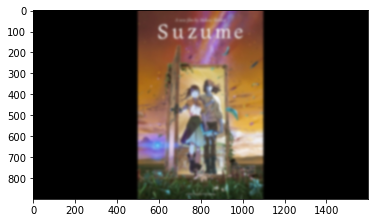

In [2]:
##First let take a look at the images in the X_train for the blur images.
img = cv2.imread("./data/blur/imgblur0.jpg")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

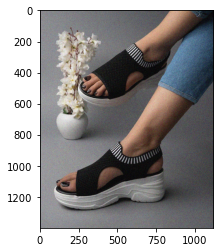

In [3]:
# Lets take a look at an example of noisy image from Noisy dataset
img_noise = cv2.imread('./data_noise/noise/imgnoisy0.jpg')
noise_rgb = cv2.cvtColor(img_noise,cv2.COLOR_BGR2RGB)
plt.imshow(noise_rgb)

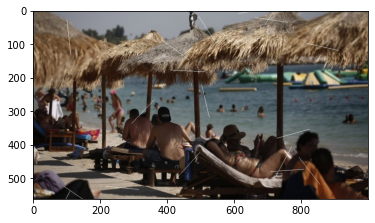

In [4]:
# Lets take a look at an example of scratched image from Scratched dataset
img_scratch = cv2.imread("./data_scratch/scratched/imgscratched25.jpg")
scratch_rgb = cv2.cvtColor(img_scratch,cv2.COLOR_BGR2RGB)
plt.imshow(scratch_rgb)

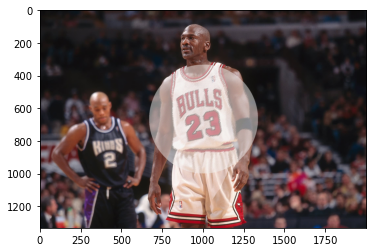

In [5]:
# Lets take a look at an example of image spoiled by a watermark
img_watermark = cv2.imread("./data_water_spilled/water_spilled/waterspilled29.jpg")
watermark_rgb = cv2.cvtColor(img_watermark,cv2.COLOR_BGR2RGB)
plt.imshow(watermark_rgb)

## Providing paths to data folders

In [6]:
#Path to Blur Images and their Sharp Counterparts
path_to_blur = './data/blur'
path_to_sharp = './data/sharp'

In [7]:
#Path to Noisy Images and their Clear Counterparts
path_to_noise = './data_noise/noise'
path_to_clear = './data_noise/clear'

In [8]:
#Path to Scratched Images and their Plain Counterparts
path_to_scratch = './data_scratch/scratched'
path_to_plain = './data_scratch/original'

In [9]:
#Path to Water-Spilled Images and their Normal Counterparts
path_to_water = './data_water_spilled/water_spilled'
path_to_normal='./data_water_spilled/normal'

## Data Pre-Processing

In [10]:
## image resizing to make sure every single input into the CNN is same, to make sure Data Cardinality is not Ambingious
# writing a function for it
X,Y = [],[] # to store all the resized images
Original_Sizes = [] #a list to maintain the original sizes of the images, will make post-processing easier
def resizer(image_path,Storing,desired_width,desired_height,SizeIndx):
    for image in os.scandir(image_path):
        img = cv2.imread(image.path)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # converting image from standard BGR to required RGB
        
        orig_size = img.shape #finding the original size of the image
        SizeIndx.append(orig_size) # appending the original size of the image
                    
        resized = cv2.resize(img,(desired_width,desired_height))
        Storing.append(resized) #storing the resied image in X

In [11]:
## Normalizing the image, to increases the performance of the CNN
X_act,Y_act = [],[] #to store the normalized image
def normalizer(paths,storage):
    for image in paths:
        normal = image/255.0
        storage.append(normal)

In [12]:
#pre-processing for Blurry Image data
X_blur = []
Y_blur = []
Blur_Size=[] ##only one size_indx is enough as the order of images is same in both X and Y data files
Y_size = []
## Resizing
resizer(path_to_blur,X_blur,256,256,Blur_Size)
resizer(path_to_sharp,Y_blur,256,256,Y_size)
#Normalizing
X_blur_act = []
Y_blur_act =[]
normalizer(X_blur,X_blur_act)
normalizer(Y_blur,Y_blur_act)

In [13]:
#pre-processing for Noisy Image data
X_noise = []
Y_noise = []
Noise_Size =[] ##only one size_indx is enough as the order of images is same in both X and Y data files
Y_size = []
##Resizing
resizer(path_to_noise,X_noise,256,256,Noise_Size)
resizer(path_to_clear,Y_noise,256,256,Y_size)
#Normalization
X_noise_act = []
Y_noise_act=[]
normalizer(X_noise,X_noise_act)
normalizer(Y_noise,Y_noise_act)

In [14]:
#pre-procesing for Scratched Image data
X_scratch=[]
Y_scratch =[]
Scratch_Size=[] ##only one size_indx is enough as the order of images is same in both X and Y data files
Y_size = []
##Resizing
resizer(path_to_scratch,X_scratch,256,256,Scratch_Size)
resizer(path_to_plain,Y_scratch,256,256,Y_size)
#Normalize
X_scratch_act=[]
Y_scratch_act=[]
normalizer(X_scratch,X_scratch_act)
normalizer(Y_scratch,Y_scratch_act)

In [15]:
#pre-processing for Water-Spilled Image data
X_water = []
Y_water = []
Water_Size =[] ##only one size_indx is enough as the order of images is same in both X and Y data files
Y_size = []
##Resizing
resizer(path_to_water,X_water,256,256,Water_Size)
resizer(path_to_normal,Y_water,256,256,Y_size)
#Normalize
X_water_act = []
Y_water_act=[]
normalizer(X_water,X_water_act)
normalizer(Y_water,Y_water_act)

## Visualizing the Data

In [16]:
## Just to make sure the images in X and Y are as we want, post resizing and normalizing
#writing a function to check by visualizing the data
def checker(path): 
    for image in path:
        plt.imshow(image) #To see if the image is being displayed
        print(image.shape) ## To check resizing
        if np.all((0 <= image) & (image <= 1)): ## To check normmaliztion
            print(True)
        break ## as just looking at only the first element will prove that our pre-processing has been carried properly.

(256, 256, 3)
True


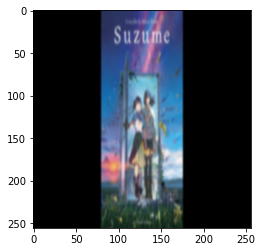

In [17]:
#visualizing for Blur Data
checker(X_blur_act)

(256, 256, 3)
True


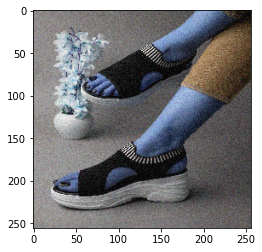

In [18]:
#visualizing for Noisy Data
checker(X_noise_act)

(256, 256, 3)
True


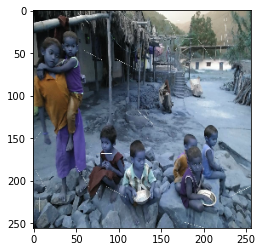

In [19]:
#visualizing for Scratched Data
checker(X_scratch_act)

(256, 256, 3)
True


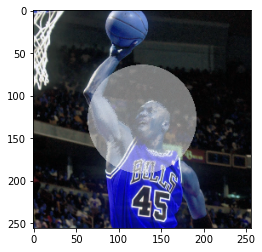

In [20]:
#visualizing for Water_spilled Data
checker(X_water_act)

## Preparing Data for CNN - Splitting the Data Into Train and Test and Stacking

In [21]:
## The data must be split into Train and Test Data to be fed to the CNN to train and test the model created.
#Importing required library to split the data
from sklearn.model_selection import train_test_split

In [22]:
#splitting processed Blur data into train and test data
x_train_blur,x_test_blur,y_train_blur,y_test_blur = train_test_split(X_blur_act,Y_blur_act,random_state=0)

In [23]:
#splitting processed Noise data into train and test data
x_train_noise,x_test_noise,y_train_noise,y_test_noise = train_test_split(X_noise_act,Y_noise_act,random_state=0)

In [24]:
#splitting processed Scratched data into train and test data
x_train_scratch,x_test_scratch,y_train_scratch,y_test_scratch = train_test_split(X_scratch_act,Y_scratch_act,random_state=0)

In [25]:
#splitting processed Water-Spilled data into train and test data
x_train_water,x_test_water,y_train_water,y_test_water = train_test_split(X_water_act,Y_water_act,random_state=0)

In [26]:
#Splitting the Indexes in the same order as the data has been split, so we can achieve the original size of the image back.
def Index_Splitting(images):
    indices = list(range(len(images)))
    train_idx,test_idx = train_test_split(indices,random_state=0)
    return test_idx

In [27]:
##Splitting Indexs for blur images
Index_Blur = [Blur_Size,Index_Splitting(X_blur_act)]

In [28]:
##Splitting Indexs for noise images
Index_Noise = [Noise_Size,Index_Splitting(X_noise_act)]

In [29]:
##Splitting Indexs for scratch images
Index_Scratch = [Scratch_Size,Index_Splitting(X_scratch_act)]

In [30]:
##Splitting Indexs for water_spill images
Index_Water = [Water_Size,Index_Splitting(X_water_act)]

In [31]:
#passing the test and train blur data through the np.stack function
x_train_blur = np.stack(x_train_blur,axis=0)
x_test_blur = np.stack(x_test_blur,axis=0)
y_train_blur = np.stack(y_train_blur,axis=0)
y_test_blur = np.stack(y_test_blur,axis=0)

In [32]:
#passing the test and train noise data through the np.stack function
x_train_noise = np.stack(x_train_noise,axis=0)
x_test_noise = np.stack(x_test_noise,axis=0)
x_train_noise = np.stack(y_train_noise,axis=0)
y_test_noise = np.stack(y_test_noise,axis=0)

In [33]:
#passing the test  and train scratch data through the np.stack function
x_train_scratch = np.stack(x_train_scratch,axis=0)
x_test_scratch = np.stack(x_test_scratch,axis=0)
y_train_scratch = np.stack(y_train_scratch,axis=0)
y_test_scratch = np.stack(y_test_scratch,axis=0)

In [34]:
##passing the test and train water-pilled data through the np.stack function
x_train_water = np.stack(x_train_water,axis=0)
x_test_water = np.stack(x_test_water,axis=0)
y_train_water = np.stack(y_train_water,axis=0)
y_test_water = np.stack(y_test_water,axis=0)

## Saving the Processed Data

In [35]:
#writing a function to save the Pre-Prcoessed images, in the float values
def saver(outputs,path_to_save,category_name):
    count = 0 #Maintaing the count, useful in naming the files to be saved
    for image in outputs:
        saving_name = category_name + str(count) + '.npy' #creating the name of the file to be saved in the folder
        saving_file = path_to_save + '\\' + saving_name
        np.save(saving_file,image)
        count+=1 #Incrementing the count

### Proviing Paths

In [36]:
#Paths for blur
path_to_X_blur_train = './data/X/train'
path_to_X_blur_test = './data/X/test'
path_to_Y_blur_train= './data/Y/train'
path_to_Y_blur_test = './data/Y/test'

In [37]:
#Paths for noise
path_to_X_noise_train = './data_noise/X/train'
path_to_X_noise_test =  './data_noise/X/test'
path_to_Y_noise_train= './data_noise/Y/train'
path_to_Y_noise_test = './data_noise/Y/test'

In [38]:
#Paths for scratched
path_to_X_scratch_train = './data_scratch/X/train'
path_to_X_scratch_test = './data_scratch/X/test'
path_to_Y_scratch_train= './data_scratch/Y/train'
path_to_Y_scratch_test = './data_scratch/Y/test'

In [39]:
#Path for water_spilled
path_to_X_water_train = './data_water_spilled/X/train'
path_to_X_water_test = './data_water_spilled/X/test'
path_to_Y_water_train = './data_water_spilled/Y/train'
path_to_Y_water_test= './data_water_spilled/Y/test'

### Creating the Folders in given paths

In [40]:
## Creating the folder where we will save the prepared images that will be fed to the CNN
# writig a function for folder creation
def folder_creation(folder_path):
    if os.path.exists(folder_path): #to check if path already exists
        shutil.rmtree(folder_path) #to remove any prior folder in the name of our file, to avoid conclusion
    os.mkdir(folder_path)
    print('File has been sucessfully created.') #to ensure complete running of the code

In [41]:
folder_creation(path_to_X_blur_train)
folder_creation(path_to_Y_blur_train)
folder_creation(path_to_X_blur_test)
folder_creation(path_to_Y_blur_test)

File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.


In [42]:
folder_creation(path_to_X_noise_train)
folder_creation(path_to_Y_noise_train)
folder_creation(path_to_X_noise_test)
folder_creation(path_to_Y_noise_test)

File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.


In [43]:
folder_creation(path_to_X_scratch_train)
folder_creation(path_to_Y_scratch_train)
folder_creation(path_to_X_scratch_test)
folder_creation(path_to_Y_scratch_test)

File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.


In [44]:
folder_creation(path_to_X_water_train)
folder_creation(path_to_Y_water_train)
folder_creation(path_to_X_water_test)
folder_creation(path_to_Y_water_test)

File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.
File has been sucessfully created.


### Saving

In [45]:
# saving blur images in folders
saver(x_train_blur,path_to_X_blur_train,'X_blur_train')
saver(y_train_blur,path_to_Y_blur_train,'Y_blur_train')
saver(x_test_blur,path_to_X_blur_test,'X_blur_test')
saver(y_test_blur,path_to_Y_blur_test,'Y_blur_test')

In [46]:
# saving noise mages in folders
saver(x_train_noise,path_to_X_noise_train,'X_noise_train')
saver(y_train_noise,path_to_Y_noise_train,'Y_noise_train')
saver(x_test_noise,path_to_X_noise_test,'X_noise_test')
saver(y_test_noise,path_to_Y_noise_test,'Y_noise_test')

In [47]:
# saving scratched images in folders
saver(x_train_scratch,path_to_X_scratch_train,'X_scratch_train')
saver(y_train_scratch,path_to_Y_scratch_train,'Y_scratch_train')
saver(x_test_scratch,path_to_X_scratch_test,'X_scratch_test')
saver(y_test_scratch,path_to_Y_scratch_test,'Y_scratch_test')

In [48]:
# saving water_spilled images in folders
saver(x_train_water,path_to_X_water_train,'X_water_train')
saver(y_train_water,path_to_Y_water_train,'Y_water_train')
saver(x_test_water,path_to_X_water_test,'X_water_test')
saver(y_test_water,path_to_Y_water_test,'Y_water_test')

In [49]:
#Saving Indexes
import pickle
with open('lists.pkl','wb') as f:
    pickle.dump((Index_Blur,Index_Noise,Index_Scratch,Index_Water),f)